In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import collections
sns.set_theme(style="darkgrid")
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
plt.rcParams['figure.dpi'] = 100

## Pre-process Data 

In [3]:
path = 'C:\\Users\\User\\Desktop\\Y3S2\\BT4222\\Group Project\\Amazon Review Cleaned.csv'
df = pd.read_csv(path)
df.head(10)

C:\Users\User\anaconda3\envs\amazonEDA\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (9,23) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Unnamed: 0_x,index,category,tech1,description,fit,title,also_buy,tech2,...,unixReviewTime,reviewClean,summaryClean,reviewCleanLemm,tb_score,afinn_score,vader_com,vader_pos,vader_neg,vader_neu
0,0,11,2418,"['Electronics', 'Computers & Accessories']",NaN,"['High quality, extremely durable 8-mm videota...",NaN,"Maxell GX-MP 120 Camcorder tapes, 3 Pack",[],NaN,...,1410134400,tapes exactly wanted using seller,maxell tapes,tape exactly want use seller,0.250000,1.0,0.0772,0.245,-0.000,0.755
1,1,11,2418,"['Electronics', 'Computers & Accessories']",NaN,"['High quality, extremely durable 8-mm videota...",NaN,"Maxell GX-MP 120 Camcorder tapes, 3 Pack",[],NaN,...,1436745600,love product not readily available anymore gra...,still works great,love product not readily available anymore gra...,0.266667,6.0,0.8020,0.474,-0.000,0.526
2,2,11,2418,"['Electronics', 'Computers & Accessories']",NaN,"['High quality, extremely durable 8-mm videota...",NaN,"Maxell GX-MP 120 Camcorder tapes, 3 Pack",[],NaN,...,1435104000,good qualiry,five stars,good qualiry,0.700000,3.0,0.4404,0.744,-0.000,0.256
3,3,11,2418,"['Electronics', 'Computers & Accessories']",NaN,"['High quality, extremely durable 8-mm videota...",NaN,"Maxell GX-MP 120 Camcorder tapes, 3 Pack",[],NaN,...,1420761600,no good,one star,no good,-0.350000,2.0,0.1779,0.569,-0.431,0.000
4,4,11,2418,"['Electronics', 'Computers & Accessories']",NaN,"['High quality, extremely durable 8-mm videota...",NaN,"Maxell GX-MP 120 Camcorder tapes, 3 Pack",[],NaN,...,1416614400,old camcorder worked great needed new blank tapes,old camcorder still need,old camcorder work great need new blank tape,0.259091,3.0,0.6249,0.369,-0.000,0.631
5,5,11,2418,"['Electronics', 'Computers & Accessories']",NaN,"['High quality, extremely durable 8-mm videota...",NaN,"Maxell GX-MP 120 Camcorder tapes, 3 Pack",[],NaN,...,1516579200,everything expected,five stars,everything expect,0.000000,0.0,0.0000,0.000,-0.000,1.000
6,6,11,2418,"['Electronics', 'Computers & Accessories']",NaN,"['High quality, extremely durable 8-mm videota...",NaN,"Maxell GX-MP 120 Camcorder tapes, 3 Pack",[],NaN,...,1471910400,good item thank,five stars,good item thank,0.700000,5.0,0.6597,0.844,-0.000,0.156
7,7,16,2803,"['Electronics', 'Portable Audio & Video', 'Rad...",NaN,['Get FM stereo/MW/SW1/SW2 with this F.A. Pors...,NaN,ETON G2000A AM/FM Shortwave Radio (Discontinue...,[],NaN,...,1333324800,couple radios part really happy many years gre...,one version great one terrible,couple radio part really happy many year great...,0.223182,14.0,0.7931,0.163,-0.112,0.725
8,8,16,2803,"['Electronics', 'Portable Audio & Video', 'Rad...",NaN,['Get FM stereo/MW/SW1/SW2 with this F.A. Pors...,NaN,ETON G2000A AM/FM Shortwave Radio (Discontinue...,[],NaN,...,1310515200,reviews least ten years old bought used abused...,bought goodwill dollars,review least ten year old bought use abuse rec...,0.006548,-1.0,-0.6124,0.078,-0.162,0.760
9,9,17,2804,"['Electronics', 'Portable Audio & Video', 'Mic...",NaN,"['The Perfect Solution for dictation, lectures...",NaN,Sony 3MC-60B Microcassette - 3 Pack,[],NaN,...,1494806400,received tapes theyare made thailand not mexic...,made thailand not mexico,receive tape theyare make thailand not mexico ...,0.000000,2.0,0.0000,0.000,-0.000,1.000


In [6]:
#drop columns
df.drop(columns=['Unnamed: 0', 'Unnamed: 0_x', 'index', 'fit','tech1', 'tech2', 'also_buy', 'also_view', 'similar_item',
                 'details', 'Unnamed: 0_y', 'vote', 'style'], inplace=True)
df.head(5)

,category,description,title,brand,feature,rank,main_cat,date,price,asin,...,unixReviewTime,reviewClean,summaryClean,reviewCleanLemm,tb_score,afinn_score,vader_com,vader_pos,vader_neg,vader_neu
0,"['Electronics', 'Computers & Accessories']","['High quality, extremely durable 8-mm videota...","Maxell GX-MP 120 Camcorder tapes, 3 Pack",Maxell,"['High quality, extremely durable 8mm videotap...","['>#15,985 in Electronics (See Top 100 in Elec...",Home Audio & Theater,"September 4, 1973",35.89,B00000J1EI,...,1410134400,tapes exactly wanted using seller,maxell tapes,tape exactly want use seller,0.250000,1.0,0.0772,0.245,-0.000,0.755
1,"['Electronics', 'Computers & Accessories']","['High quality, extremely durable 8-mm videota...","Maxell GX-MP 120 Camcorder tapes, 3 Pack",Maxell,"['High quality, extremely durable 8mm videotap...","['>#15,985 in Electronics (See Top 100 in Elec...",Home Audio & Theater,"September 4, 1973",35.89,B00000J1EI,...,1436745600,love product not readily available anymore gra...,still works great,love product not readily available anymore gra...,0.266667,6.0,0.8020,0.474,-0.000,0.526
2,"['Electronics', 'Computers & Accessories']","['High quality, extremely durable 8-mm videota...","Maxell GX-MP 120 Camcorder tapes, 3 Pack",Maxell,"['High quality, extremely durable 8mm videotap...","['>#15,985 in Electronics (See Top 100 in Elec...",Home Audio & Theater,"September 4, 1973",35.89,B00000J1EI,...,1435104000,good qualiry,five stars,good qualiry,0.700000,3.0,0.4404,0.744,-0.000,0.256
3,"['Electronics', 'Computers & Accessories']","['High quality, extremely durable 8-mm videota...","Maxell GX-MP 120 Camcorder tapes, 3 Pack",Maxell,"['High quality, extremely durable 8mm videotap...","['>#15,985 in Electronics (See Top 100 in Elec...",Home Audio & Theater,"September 4, 1973",35.89,B00000J1EI,...,1420761600,no good,one star,no good,-0.350000,2.0,0.1779,0.569,-0.431,0.000
4,"['Electronics', 'Computers & Accessories']","['High quality, extremely durable 8-mm videota...","Maxell GX-MP 120 Camcorder tapes, 3 Pack",Maxell,"['High quality, extremely durable 8mm videotap...","['>#15,985 in Electronics (See Top 100 in Elec...",Home Audio & Theater,"September 4, 1973",35.89,B00000J1EI,...,1416614400,old camcorder worked great needed new blank tapes,old camcorder still need,old camcorder work great need new blank tape,0.259091,3.0,0.6249,0.369,-0.000,0.631


## Cleaning category names 

In [7]:
#correct category names
df['main_cat'] = df['main_cat'].replace(['Home Audio &amp; Theater','Camera &amp; Photo','Sports &amp; Outdoors'],['Home Audio & Theater','Camera & Photo','Sports & Outdoors'])

## Convert reviewTime to datetime 

In [8]:
df.reviewTime = pd.to_datetime(df.reviewTime)

In [9]:
df['reviewYear'] = df.reviewTime.dt.year

In [10]:
df.reviewYear.value_counts()

2016    72752
2015    64948
2017    54526
2014    43635
2013    28271
2018    23923
2012    13124
2011     8755
2010     5752
Name: reviewYear, dtype: int64

## Convert date to datetime

In [11]:
df.date = pd.to_datetime(df.date)
df['dateYear'] = df.date.dt.year
df.dateYear.value_counts()

2015.0    43813
2014.0    39616
2013.0    32253
2011.0    25380
2012.0    23624
2016.0    22605
2009.0    17388
2010.0    16711
2004.0    15421
2001.0    11125
2017.0    10285
2008.0     7309
2005.0     5435
2006.0     4533
2003.0     3586
2007.0     3538
2018.0     2989
1999.0      755
2002.0      416
1973.0      166
2000.0       68
2019.0       23
Name: dateYear, dtype: int64

## Calculate text length 

In [13]:
df['reviewTextLength'] = df['reviewText'].apply(lambda x: len(x.split()))
df['word_count'] = df['reviewCleanLemm'].apply(lambda x: len(str(x).split()))
df['title_length'] = df['title'].apply(lambda x: len(str(x).split()))

## Clean description and feature text 

In [14]:
df['description'] = df['description'].apply(lambda x: x.strip("['']"))
df['feature'] = df['feature'].apply(lambda x: x.strip("['']"))

In [15]:
df.head()

,category,description,title,brand,feature,rank,main_cat,date,price,asin,...,afinn_score,vader_com,vader_pos,vader_neg,vader_neu,reviewYear,dateYear,reviewTextLength,word_count,title_length
0,"['Electronics', 'Computers & Accessories']","High quality, extremely durable 8-mm videotape...","Maxell GX-MP 120 Camcorder tapes, 3 Pack",Maxell,"High quality, extremely durable 8mm videotape'...","['>#15,985 in Electronics (See Top 100 in Elec...",Home Audio & Theater,1973-09-04,35.89,B00000J1EI,...,1.0,0.0772,0.245,-0.000,0.755,2014,1973.0,12,5,7
1,"['Electronics', 'Computers & Accessories']","High quality, extremely durable 8-mm videotape...","Maxell GX-MP 120 Camcorder tapes, 3 Pack",Maxell,"High quality, extremely durable 8mm videotape'...","['>#15,985 in Electronics (See Top 100 in Elec...",Home Audio & Theater,1973-09-04,35.89,B00000J1EI,...,6.0,0.8020,0.474,-0.000,0.526,2015,1973.0,16,10,7
2,"['Electronics', 'Computers & Accessories']","High quality, extremely durable 8-mm videotape...","Maxell GX-MP 120 Camcorder tapes, 3 Pack",Maxell,"High quality, extremely durable 8mm videotape'...","['>#15,985 in Electronics (See Top 100 in Elec...",Home Audio & Theater,1973-09-04,35.89,B00000J1EI,...,3.0,0.4404,0.744,-0.000,0.256,2015,1973.0,3,2,7
3,"['Electronics', 'Computers & Accessories']","High quality, extremely durable 8-mm videotape...","Maxell GX-MP 120 Camcorder tapes, 3 Pack",Maxell,"High quality, extremely durable 8mm videotape'...","['>#15,985 in Electronics (See Top 100 in Elec...",Home Audio & Theater,1973-09-04,35.89,B00000J1EI,...,2.0,0.1779,0.569,-0.431,0.000,2015,1973.0,2,2,7
4,"['Electronics', 'Computers & Accessories']","High quality, extremely durable 8-mm videotape...","Maxell GX-MP 120 Camcorder tapes, 3 Pack",Maxell,"High quality, extremely durable 8mm videotape'...","['>#15,985 in Electronics (See Top 100 in Elec...",Home Audio & Theater,1973-09-04,35.89,B00000J1EI,...,3.0,0.6249,0.369,-0.000,0.631,2014,1973.0,12,8,7


## Number of reviews across years 

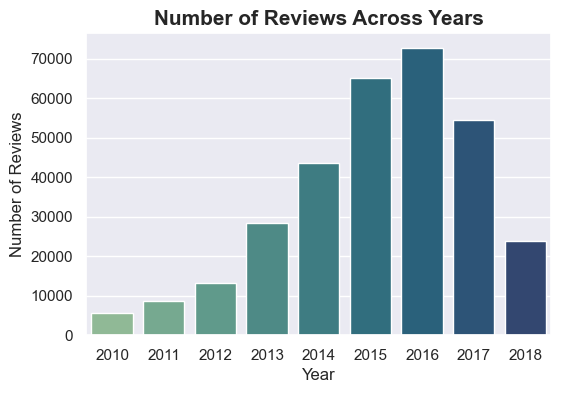

In [20]:
ax = sns.countplot(x='reviewYear', data=df, order=[2010,2011,2012,2013,2014,2015,2016,2017,2018], palette="crest")
ax.set_title('Number of Reviews Across Years', fontdict= { 'fontsize': 15, 'fontweight':'bold'})
ax.set_xlabel('Year')
ax.set_ylabel('Number of Reviews')
plt.show()

## Top 5 Most Reviewed Categories 

In [21]:
df_cat_review_count = df['main_cat'].value_counts().to_frame()
df_cat_review_count.reset_index(inplace=True)
df_cat_review_count.rename(columns={"index": "Category", "main_cat": "NumReviews"}, inplace=True)
df_cat_review_count

,Category,NumReviews
0,Home Audio & Theater,103220
1,All Electronics,101939
2,Computers,55833
3,Car Electronics,48479
4,Camera & Photo,4118
5,GPS & Navigation,1071
6,Apple Products,377
7,Sports & Outdoors,271
8,Amazon Home,215
9,Portable Audio & Accessories,115


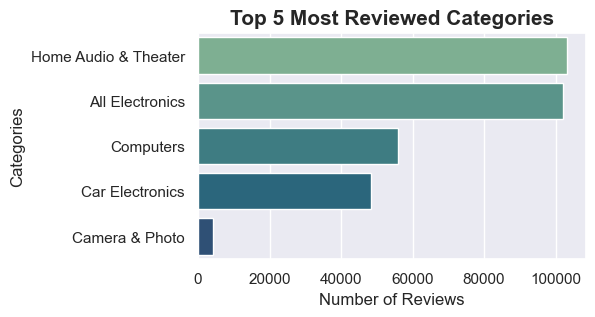

In [22]:
plt.figure(figsize=(5,3))
ax = sns.barplot(x='NumReviews', y='Category', data=df_cat_review_count.iloc[0:5,], palette="crest")
ax.set_title('Top 5 Most Reviewed Categories', fontdict= { 'fontsize': 15, 'fontweight':'bold'})
ax.set_xlabel('Number of Reviews')
ax.set_ylabel('Categories')
plt.show()

## Top 20 most reviewed brands 

In [23]:
df_brand_review_count = df['brand'].value_counts().to_frame()
df_brand_review_count.reset_index(inplace=True)
df_brand_review_count.rename(columns={"index": "Brand", "brand": "NumReviews"}, inplace=True)
df_brand_review_count.iloc[0:100,]

,Brand,NumReviews
0,Sony,18651
1,Roku,11712
2,Pyle,10033
3,Samsung,8547
4,BOSS Audio Systems,6228
...,...,...
95,TOP CASE,619
96,Anker,615
97,Koolertron,606
98,SanDisk,598


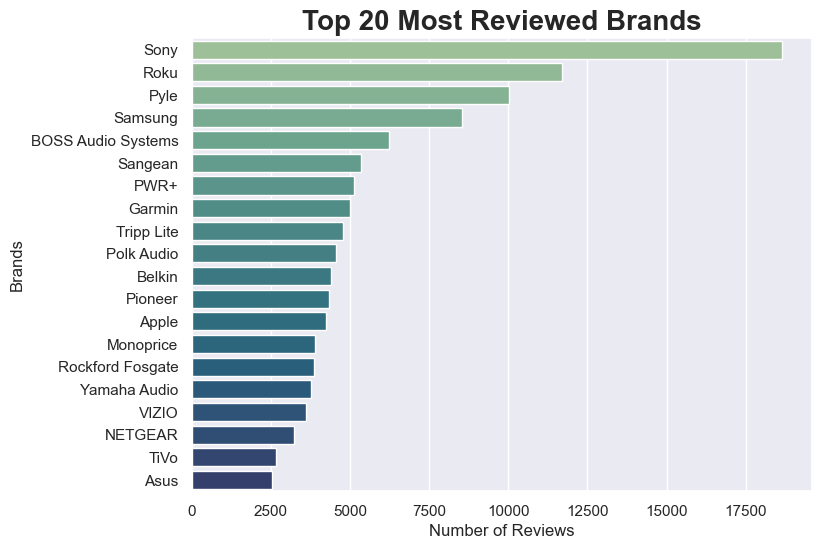

In [24]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x='NumReviews', y='Brand', data=df_brand_review_count.iloc[0:20,], palette="crest")
ax.set_title('Top 20 Most Reviewed Brands', fontdict= { 'fontsize': 20, 'fontweight':'bold'})
ax.set_xlabel('Number of Reviews')
ax.set_ylabel('Brands')
plt.show()

## Distribution of rating in reviews 

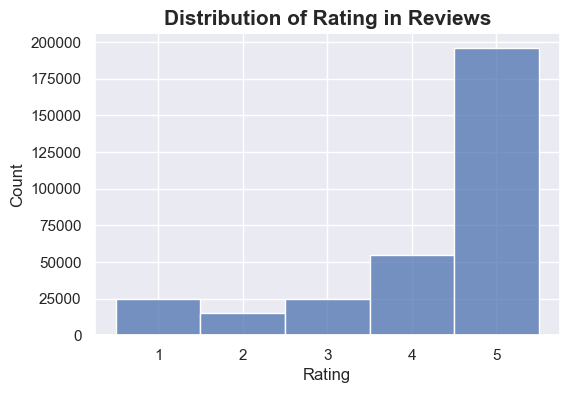

In [25]:
#plt.figure(figsize=(5,3))
ax = sns.histplot(data=df, x='Rating', discrete=True)
ax.set_title('Distribution of Rating in Reviews', fontdict= { 'fontsize': 15, 'fontweight':'bold'})
plt.show()

## Number of reviews across ranking

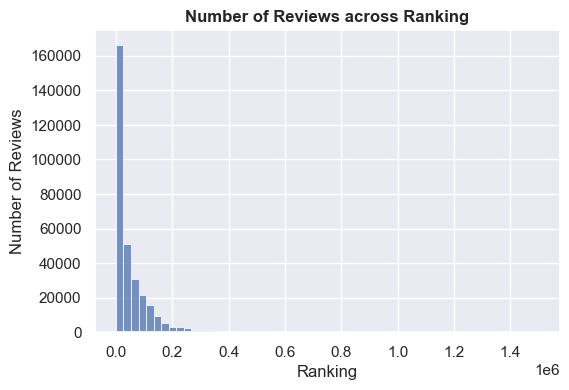

In [26]:
ax = sns.histplot(data=df, x='rankElectronics', bins=56)
ax.set_title('Number of Reviews across Ranking', fontdict= { 'fontsize': 12, 'fontweight':'bold'})
ax.set_xlabel('Ranking')
ax.set_ylabel('Number of Reviews')
plt.show()

## Review text length across ratings 

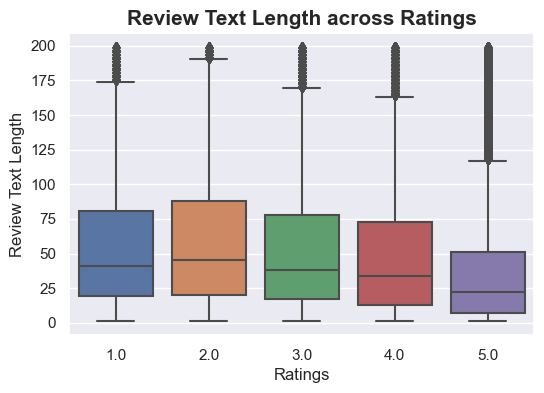

In [27]:
ax = sns.boxplot(x='Rating', y='reviewTextLength', data=df[df.reviewTextLength<200])
ax.set_title('Review Text Length across Ratings', fontdict= { 'fontsize': 15, 'fontweight':'bold'})
ax.set_xlabel('Ratings')
ax.set_ylabel('Review Text Length')
plt.show()

## Price distribution across categories 

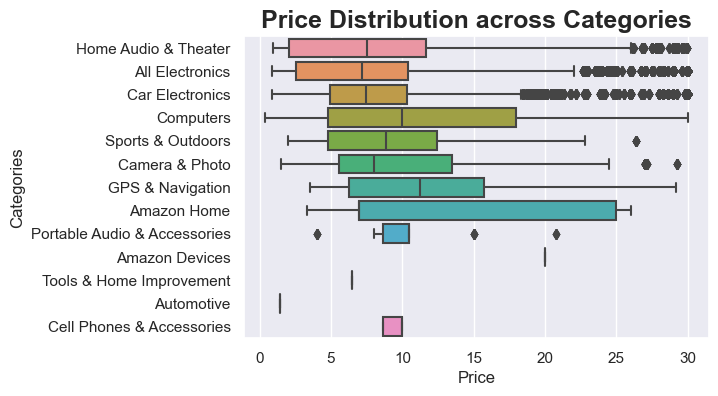

In [28]:
ax = sns.boxplot(x='price', y='main_cat', data=df[df.price <30])
ax.set_title('Price Distribution across Categories', fontdict= { 'fontsize': 18, 'fontweight':'bold'})
ax.set_xlabel('Price')
ax.set_ylabel('Categories')
plt.show()

## Price distribution across ratings 

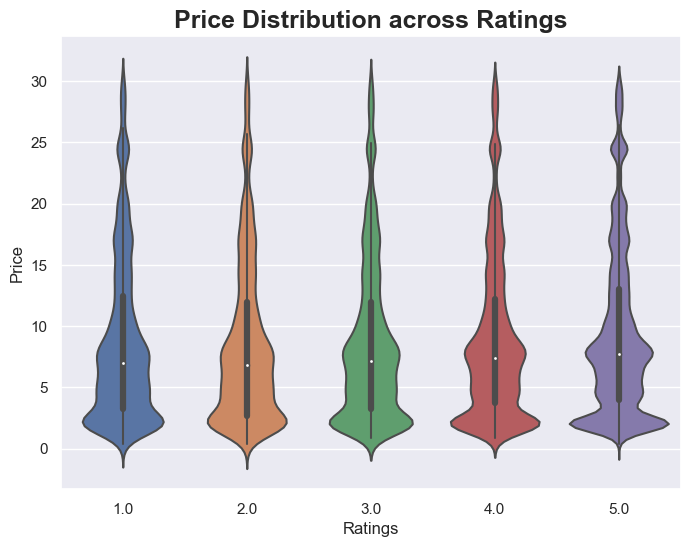

In [29]:
plt.figure(figsize=(8,6))
ax = sns.violinplot(x='Rating', y='price', data=df[df.price <30])
ax.set_title('Price Distribution across Ratings', fontdict= { 'fontsize': 18, 'fontweight':'bold'})
ax.set_xlabel('Ratings')
ax.set_ylabel('Price')
plt.show()

## Pair plots of numerical variables 

In [30]:
df_pair = df[['price', 'rankElectronics', 'reviewTextLength', 'title_length', 'main_cat']]
df_pair.head()

,price,rankElectronics,reviewTextLength,title_length,main_cat
0,35.89,15985.0,12,7,Home Audio & Theater
1,35.89,15985.0,16,7,Home Audio & Theater
2,35.89,15985.0,3,7,Home Audio & Theater
3,35.89,15985.0,2,7,Home Audio & Theater
4,35.89,15985.0,12,7,Home Audio & Theater


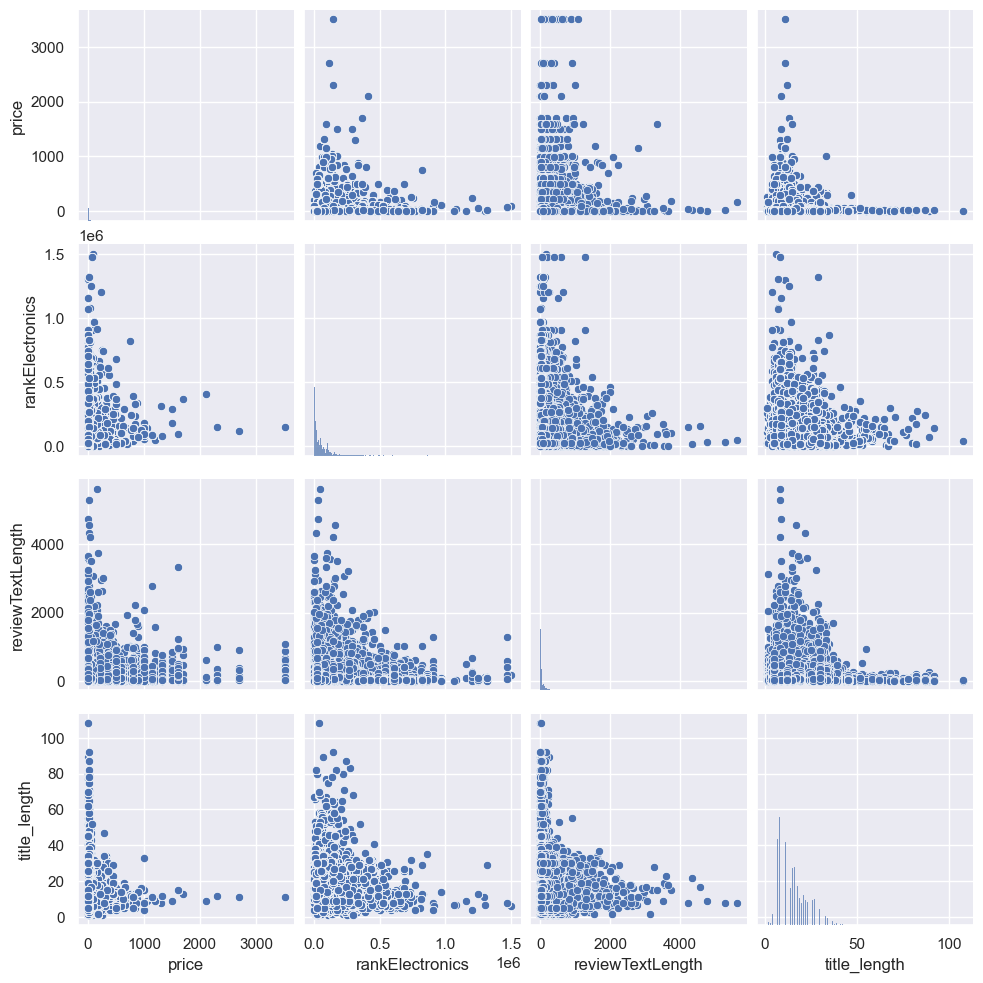

In [31]:
ax = sns.pairplot(df_pair, diag_kind='hist', kind='scatter')
plt.show()

## Correlation Heatmap 

In [32]:
df_corr = df[['price', 'rankElectronics', 'reviewTextLength', 'title_length', 'tb_score', 'afinn_score', 'vader_com']]
df_corr.corr()

,price,rankElectronics,reviewTextLength,title_length,tb_score,afinn_score,vader_com
price,1.000000,0.116773,0.081524,-0.068726,-0.002502,0.077225,0.036817
rankElectronics,0.116773,1.000000,0.082837,-0.042888,-0.028038,0.048601,0.005484
reviewTextLength,0.081524,0.082837,1.000000,-0.051483,-0.202101,0.580498,0.169662
title_length,-0.068726,-0.042888,-0.051483,1.000000,0.016149,-0.049282,-0.032072
tb_score,-0.002502,-0.028038,-0.202101,0.016149,1.000000,0.164725,0.444819
afinn_score,0.077225,0.048601,0.580498,-0.049282,0.164725,1.000000,0.577284
vader_com,0.036817,0.005484,0.169662,-0.032072,0.444819,0.577284,1.000000


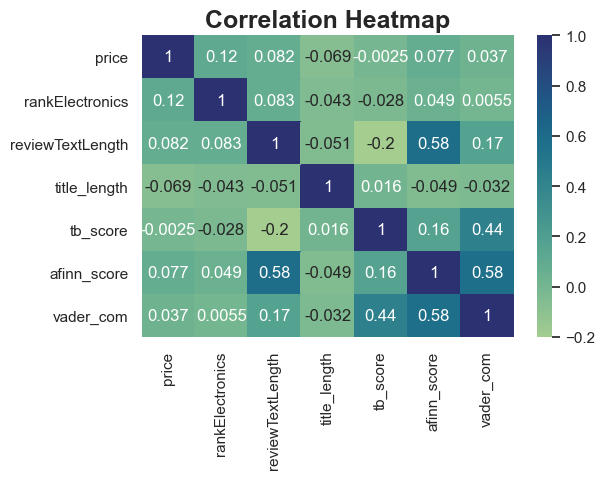

In [33]:
ax = sns.heatmap(df_corr.corr(), annot=True, cmap='crest')
ax.set_title('Correlation Heatmap', fontdict= { 'fontsize': 18, 'fontweight':'bold'})
plt.show()

## Dataframe of unique product listing 

In [34]:
df_unique_pdt = df.drop_duplicates(subset=['asin'])
df_unique_pdt.head()

,category,description,title,brand,feature,rank,main_cat,date,price,asin,...,afinn_score,vader_com,vader_pos,vader_neg,vader_neu,reviewYear,dateYear,reviewTextLength,word_count,title_length
0,"['Electronics', 'Computers & Accessories']","High quality, extremely durable 8-mm videotape...","Maxell GX-MP 120 Camcorder tapes, 3 Pack",Maxell,"High quality, extremely durable 8mm videotape'...","['>#15,985 in Electronics (See Top 100 in Elec...",Home Audio & Theater,1973-09-04,35.89,B00000J1EI,...,1.0,0.0772,0.245,-0.000,0.755,2014,1973.0,12,5,7
7,"['Electronics', 'Portable Audio & Video', 'Rad...",Get FM stereo/MW/SW1/SW2 with this F.A. Porsch...,ETON G2000A AM/FM Shortwave Radio (Discontinue...,Eton,Design by F.A. Porsche of Germany on the outsi...,"['>#186,267 in Electronics (See Top 100 in Ele...",Home Audio & Theater,1999-11-15,7.69,B00000JD4T,...,14.0,0.7931,0.163,-0.112,0.725,2012,1999.0,189,96,8
9,"['Electronics', 'Portable Audio & Video', 'Mic...","The Perfect Solution for dictation, lectures a...",Sony 3MC-60B Microcassette - 3 Pack,Sony,"Anti-static guide roller for smooth, consisten...","['>#8,344 in Electronics (See Top 100 in Elect...",Home Audio & Theater,2004-07-02,8.95,B00000JD3C,...,2.0,0.0000,0.000,-0.000,1.000,2017,2004.0,41,19,6
27,"['Electronics', 'Portable Audio & Video', 'Rad...","""Travel with the world in your hand. Small eno...",Grundig M100 Portable Radio (Discontinued by M...,Eton,"AM, FM-stereo and 6 shortwave bands (49, 41, 3...","['>#142,184 in Electronics (See Top 100 in Ele...",Home Audio & Theater,2004-07-11,7.67,B00000JMRV,...,3.0,0.4215,0.583,-0.000,0.417,2018,2004.0,6,3,7
32,"['Electronics', 'Portable Audio & Video', 'Rad...","""If you love to hear broadcasts from around th...",ETON YB300PE AM/FM Shortwave Radio (Discontinu...,Eton,"Precise AM, FM, and shortwave tuning via a dig...","['>#509,371 in Electronics (See Top 100 in Ele...",Home Audio & Theater,1973-09-04,7.69,B00000JMRX,...,-8.0,-0.9468,0.104,-0.267,0.629,2011,1973.0,154,76,8


In [35]:
df_unique_pdt.shape

(7097, 33)

## Keep only 2010-2018 unique product 

In [37]:
df_unique_pdt_yr = df_unique_pdt[df_unique_pdt.dateYear.notnull()]
df_unique_pdt_yr.dateYear = df_unique_pdt_yr.dateYear.astype(int)

C:\Users\User\anaconda3\envs\amazonEDA\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [38]:
df_unique_pdt_yr = df_unique_pdt_yr[df_unique_pdt_yr.dateYear.isin([2010,2011,2012,2013,2014,2015,2016,2017,2018])]
df_unique_pdt_yr.dateYear.value_counts()

2015    1149
2014     856
2016     739
2013     706
2012     560
2011     545
2010     349
2018     114
2017     113
Name: dateYear, dtype: int64

## Number of unique products each year 

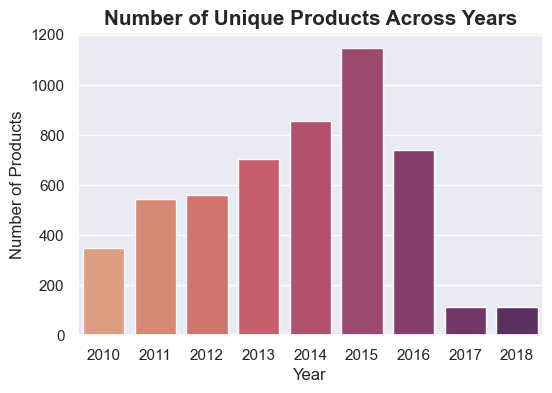

In [39]:
ax = sns.countplot(x='dateYear', data=df_unique_pdt_yr, order=[2010,2011,2012,2013,2014,2015,2016,2017,2018], palette="flare")
ax.set_title('Number of Unique Products Across Years', fontdict= { 'fontsize': 15, 'fontweight':'bold'})
ax.set_xlabel('Year')
ax.set_ylabel('Number of Products')
plt.show()

## Number of unique products in each category 

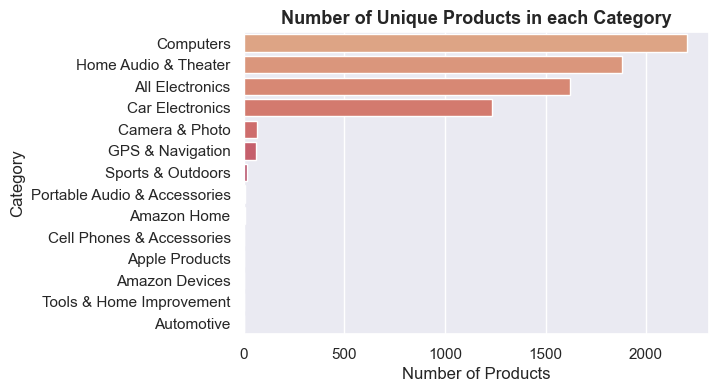

In [40]:
ax = sns.countplot(data=df_unique_pdt, y='main_cat', order=df_unique_pdt.main_cat.value_counts().index, palette="flare")
ax.set_title('Number of Unique Products in each Category', fontdict= {'fontsize': 13, 'fontweight':'bold'})
ax.set_xlabel('Number of Products')
ax.set_ylabel('Category')
plt.show()

## Number of unique products in each brand 

In [41]:
df_brand_unique_count = df_unique_pdt['brand'].value_counts().to_frame()
df_brand_unique_count.reset_index(inplace=True)
df_brand_unique_count.rename(columns={"index": "Brand", "brand": "NumProducts"}, inplace=True)
df_brand_unique_count.iloc[0:100,]

,Brand,NumProducts
0,Sony,251
1,Pyle,208
2,PWR+,159
3,Samsung,107
4,Pioneer,96
...,...,...
95,SLE-TECH,14
96,TAUPO,14
97,Marantz,14
98,Supersonic,14


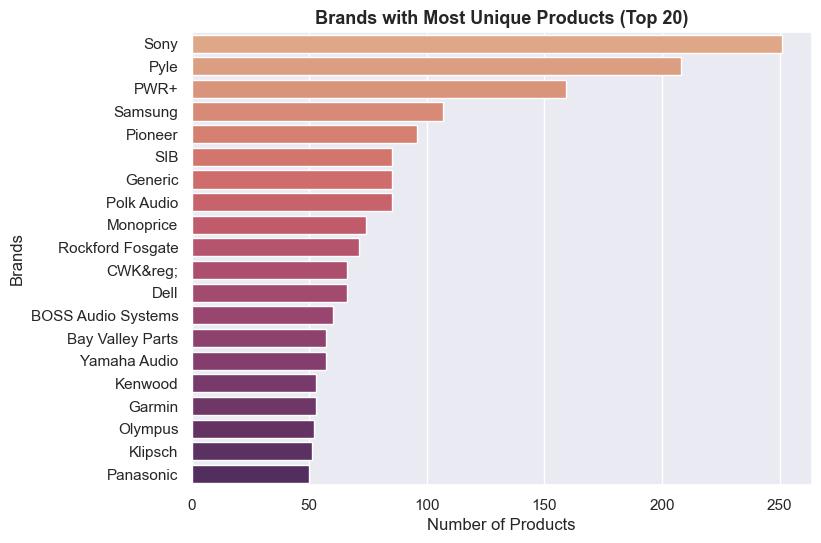

In [42]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x='NumProducts', y='Brand', data=df_brand_unique_count.iloc[0:20,], palette="flare")
ax.set_title('Brands with Most Unique Products (Top 20)', fontdict= {'fontsize': 13, 'fontweight':'bold'})
ax.set_xlabel('Number of Products')
ax.set_ylabel('Brands')
plt.show()

## Top 50 electronic products (by ranking)

In [44]:
#sort by rankElectronics
df_unique_pdt.sort_values(by=['rankElectronics'], inplace=True)
df_top_50 = df_unique_pdt.iloc[0:50,:]
df_top_50

C:\Users\User\anaconda3\envs\amazonEDA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,category,description,title,brand,feature,rank,main_cat,date,price,asin,...,afinn_score,vader_com,vader_pos,vader_neg,vader_neu,reviewYear,dateYear,reviewTextLength,word_count,title_length
173896,"['Electronics', 'Accessories & Supplies', 'Pow...",Maximize your outlets using the 6-Outlet gener...,"GE Power Strip Surge Protector, 6 Outlets, 10 ...",GE,Power More -- This power strip surge protector...,['>#56 in Electronics (See Top 100 in Electron...,Home Audio & Theater,2011-11-01,14.61,B00DOMYL24,...,3.0,0.4404,0.744,-0.000,0.256,2015,2011.0,4,2,25
249994,"['Electronics', 'Accessories & Supplies', 'Pow...",An Amazon Brand.,AmazonBasics 6-Outlet Surge Protector Power St...,AmazonBasics,"2 pack of 6-outlet, surge-protector power stri...",['>#59 in Electronics (See Top 100 in Electron...,Home Audio & Theater,2015-07-22,2.00,B00TP1BWMK,...,6.0,0.8442,0.353,-0.052,0.595,2015,2015.0,42,20,9
136202,"['Electronics', 'Television & Video', 'DVD Pla...",Experience near HD picture quality and solid s...,"Sony DVPSR510H DVD Player, with HDMI port (Ups...",Sony,"Ultra Slim, New Mid Size Design, HDMI Output, ...","['>#67 in Electronics (See top 100)', '>#1 in ...",All Electronics,2012-04-01,2.00,B007F9XHAY,...,1.0,0.5848,0.107,-0.086,0.807,2012,2012.0,345,159,8
178468,"['Electronics', 'Computers & Accessories', 'La...",,Plugable USB 3.0 Universal Laptop Docking Stat...,Plugable,Provides SuperSpeed USB 3.0 (5Gbps) link from ...,['>#73 in Electronics (See Top 100 in Electron...,Computers,2013-08-15,8.65,B00ECDM78E,...,8.0,0.9423,0.173,-0.120,0.708,2012,2013.0,371,204,20
307557,"['Electronics', 'Home Audio', 'Home Theater', ...","""Infinite Compatibility<br> Streaming wireless...",TaoTronics Bluetooth 5.0 Transmitter and Recei...,TaoTronics,LOW DELAY: aptX Low Latency for High-fidelity ...,['>#73 in Electronics (See Top 100 in Electron...,All Electronics,2016-04-26,2.04,B01EHSX28M,...,-1.0,0.8801,0.201,-0.136,0.663,2017,2016.0,237,112,20
270905,"['Electronics', 'Accessories & Supplies', 'Cor...",,Avantree Pack of 20 Reusable Cord Organizer Ke...,Avantree,CABLE ORGANIZER AND MANAGEMENT: These cable ti...,['>#127 in Electronics (See Top 100 in Electro...,All Electronics,2015-07-22,6.99,B012A5D9BO,...,2.0,0.2023,0.643,-0.000,0.357,2016,2015.0,3,2,26
228444,"['Electronics', 'Computers & Accessories', 'La...",<b>HAVIT: Among Amazon\'s Top 3 laptop cooler ...,Havit HV-F2056 15.6&quot;-17&quot; Laptop Cool...,Havit,"Ultra-Portable]: Slim, portable, and light wei...",['>#165 in Electronics (See Top 100 in Electro...,Computers,2014-09-17,2.54,B00NNMB3KS,...,24.0,0.9862,0.405,-0.044,0.551,2014,2014.0,144,67,15
62287,"['Electronics', 'Home Audio', 'Turntables & Ac...","<h2>Overview</h2>', 'These are the same high-q...",MOBILE FIDELITY SOUND LAB INNER SLEEVES - MOFI...,Mobile Fidelity,"Three-ply, anti-static, premium record sleeves...",['>#177 in Electronics (See Top 100 in Electro...,All Electronics,2010-03-26,20.00,B001LQSFKY,...,-2.0,0.6922,0.204,-0.103,0.693,2012,2010.0,99,45,12
232229,"['Electronics', 'Accessories & Supplies', 'Cor...",,"Attmu 50 PCS Reusable Fastening Cable Ties, Mi...",Attmu,DEFINITELY SUPER VALUABLE - Made from fabric m...,['>#179 in Electronics (See Top 100 in Electro...,All Electronics,2014-10-08,7.99,B00O9VKVFK,...,2.0,0.4939,0.318,-0.000,0.682,2014,2014.0,22,11,16
282023,"['Electronics', 'Home Audio', 'Speakers', 'Boo...",,Edifier R1280T Powered Bookshelf Speakers - 2....,Edifier,2 x AUX INPUT - Convenient connection to any d...,['>#181 in Electronics (See Top 100 in Electro...,Home Audio & Theater,2015-10-15,6.12,B016P9HJIA,...,9.0,0.9274,0.354,-0.031,0.615,2016,2015.0,69,29,22


## Distribution of rating (Top 50 products) 

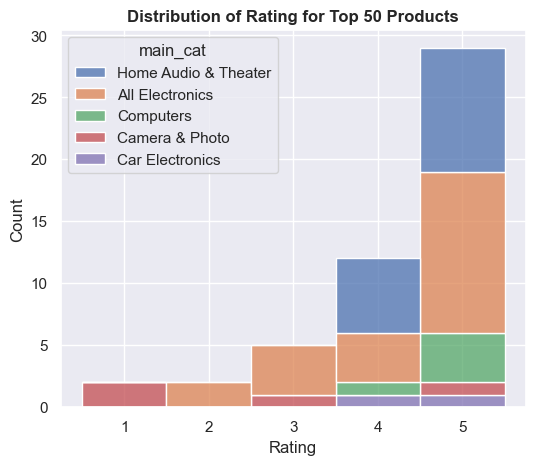

In [46]:
plt.figure(figsize=(6,5))
ax = sns.histplot(data=df_top_50, x='Rating', discrete=True, hue='main_cat', multiple='stack')
ax.set_title('Distribution of Rating for Top 50 Products', fontdict= { 'fontsize': 12, 'fontweight':'bold'})
plt.show()

## Price against ranking (Top 50 products) 

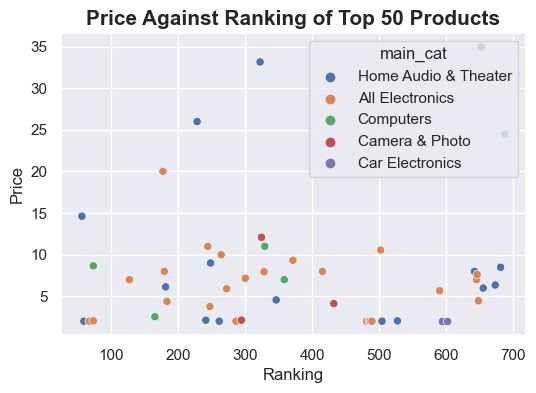

In [48]:
ax = sns.scatterplot(data=df_top_50, x='rankElectronics', y='price', hue='main_cat')
ax.set_title('Price Against Ranking of Top 50 Products', fontdict= { 'fontsize': 15, 'fontweight':'bold'})
ax.set_xlabel('Ranking')
ax.set_ylabel('Price')
plt.show()

## Number of Reviews for Top 50 Products 

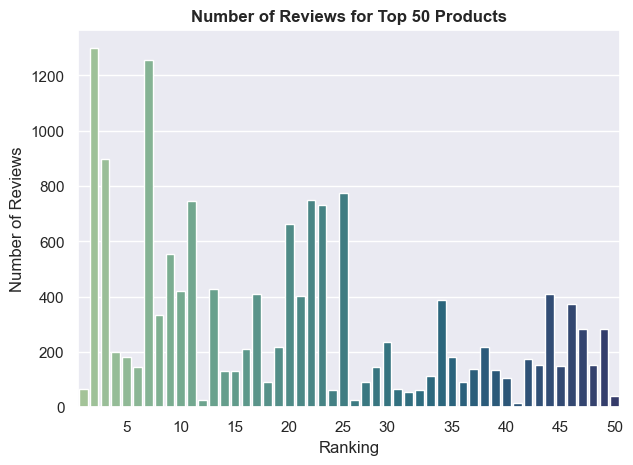

In [49]:
reviews_top50pdt = df[df.asin.isin(df_top_50['asin'].tolist())]

plt.figure(figsize=(7,5))
ax = sns.countplot(data=reviews_top50pdt, x='asin', order=df_top_50['asin'], palette="crest")
ax.set_xticks([4,9,14,19,24,28,34,39,44,49])
ax.set_xticklabels(labels = range(5,51,5))
ax.set_xlabel('Ranking')
ax.set_ylabel('Number of Reviews')
ax.set_title('Number of Reviews for Top 50 Products', fontdict= { 'fontsize': 12, 'fontweight':'bold'})
plt.show()

## Brands of Top 50 Products

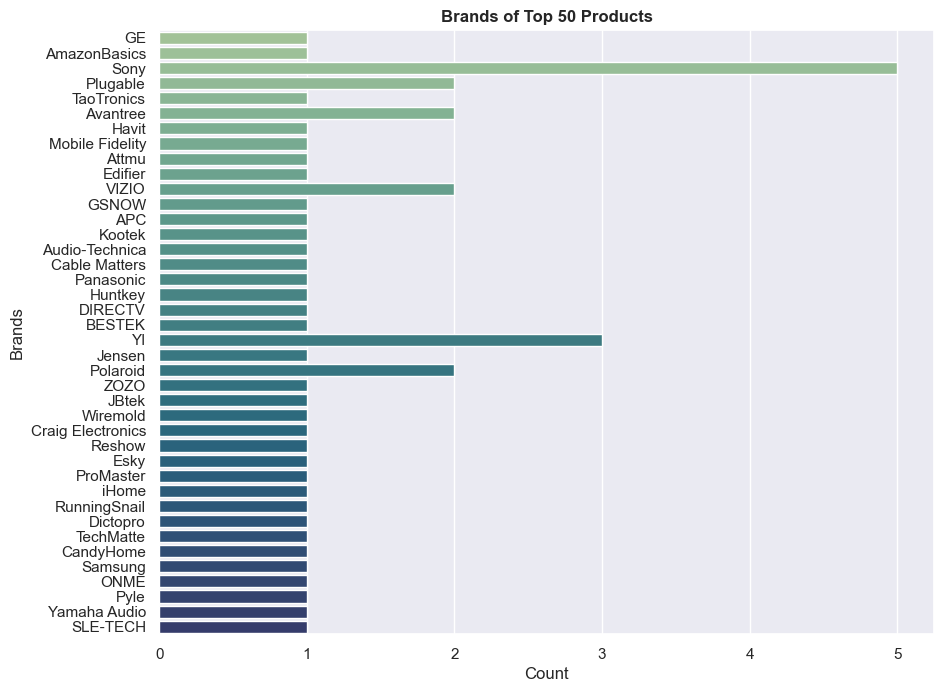

In [50]:
plt.figure(figsize=(10,8))
ax = sns.countplot(y='brand',data=df_top_50, palette="crest")
ax.set_title('Brands of Top 50 Products', fontdict= { 'fontsize': 12, 'fontweight':'bold'})
ax.set_xlabel('Count')
ax.set_ylabel('Brands')
plt.show()

# Review Text Analysis 

## Common Words in Review Text

In [51]:
#create list of words from review
words_in_review = [str(review).split() for review in df.reviewCleanLemm]

#calculate and plot word frequency
# flatten list of words
all_words = [word for words in words_in_review for word in words]

#Create counter
word_count = collections.Counter(all_words)

#create df
df_word_count = pd.DataFrame(word_count.most_common(50), columns=['words', 'count'])

df_word_count.head()

,words,count
0,not,160220
1,work,145312
2,use,128389
3,great,112785
4,sound,101353


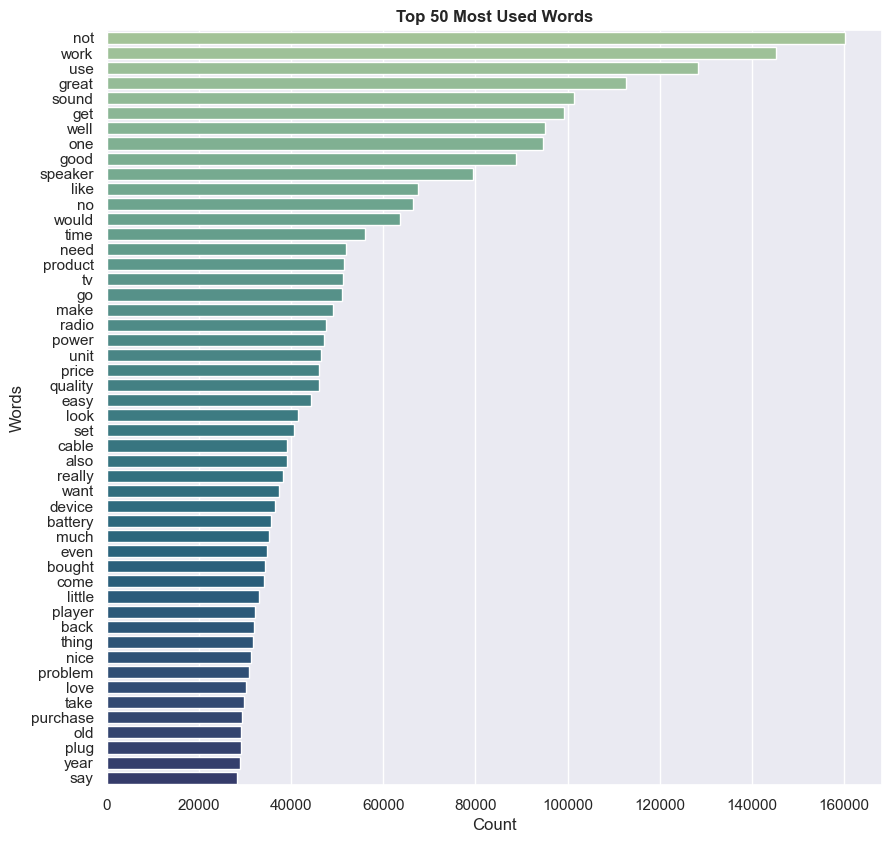

In [52]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x='count',y='words',data=df_word_count, palette="crest")
ax.set_title('Top 50 Most Used Words', fontdict= { 'fontsize': 12, 'fontweight':'bold'})
ax.set_xlabel('Count')
ax.set_ylabel('Words')
plt.show()

## Word cloud 

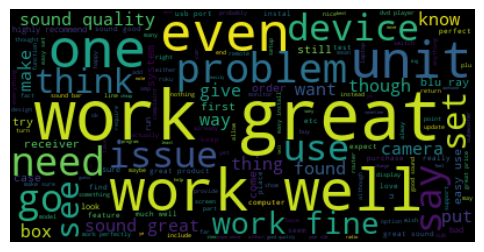

In [53]:
all_words_str = ' '.join(all_words)

wordcloud = WordCloud().generate(all_words_str)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Plot Distribution of sentiment scores for reviews 

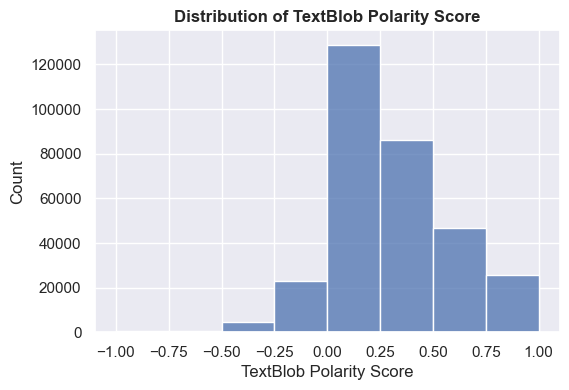

In [54]:
ax = sns.histplot(data=df, x='tb_score',bins=8)
ax.set_title('Distribution of TextBlob Polarity Score', fontdict= { 'fontsize': 12, 'fontweight':'bold'})
ax.set_xlabel('TextBlob Polarity Score')
plt.show()

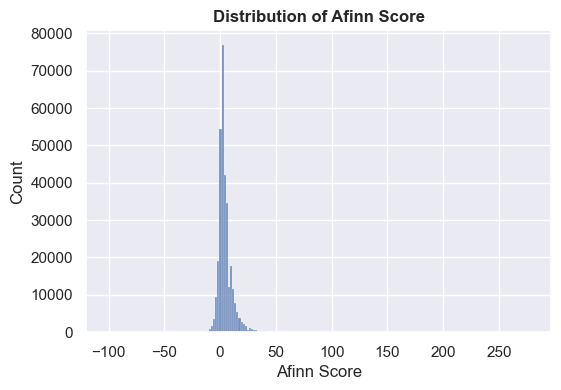

In [55]:
ax = sns.histplot(data=df, x='afinn_score', bins=200)
ax.set_title('Distribution of Afinn Score', fontdict= { 'fontsize': 12, 'fontweight':'bold'})
ax.set_xlabel('Afinn Score')
plt.show()

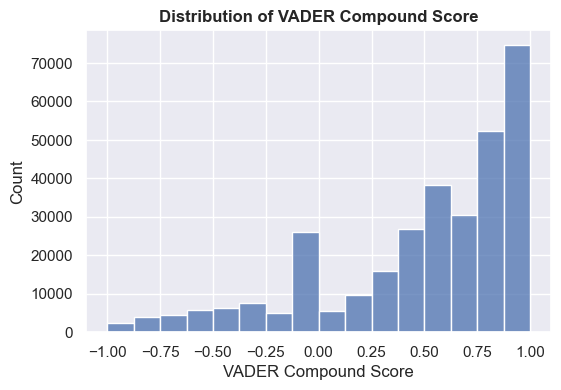

In [56]:
ax = sns.histplot(data=df, x='vader_com', bins=16)
ax.set_title('Distribution of VADER Compound Score', fontdict= { 'fontsize': 12, 'fontweight':'bold'})
ax.set_xlabel('VADER Compound Score')
plt.show()

## Pairplots of sentiment scores 

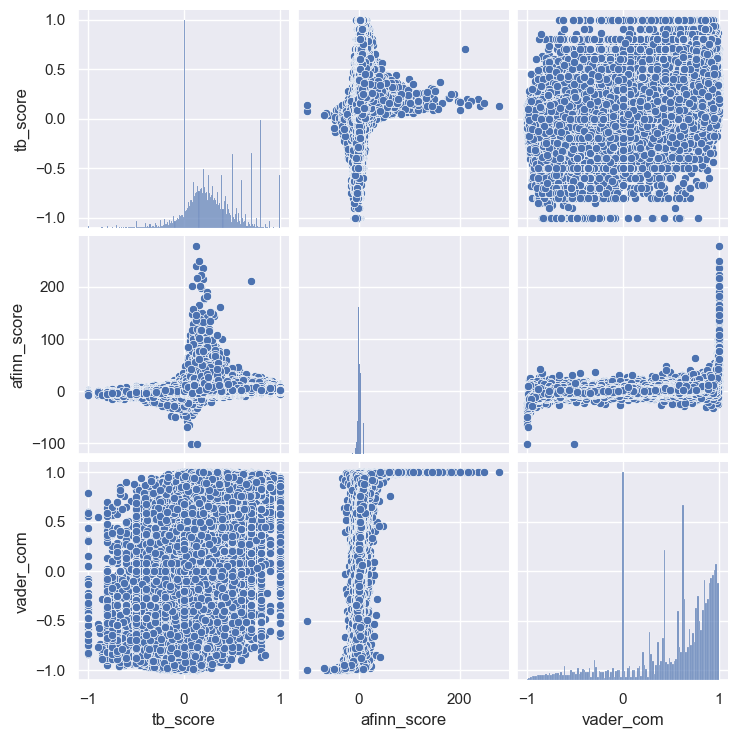

In [57]:
df_scores = df[['tb_score', 'afinn_score', 'vader_com']]

sns.pairplot(df_scores)
plt.show()